In [259]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
snpeff_stats = !ls */*_snpeff_stats.genes.txt
snpeff_stats = snpeff_stats[1:]


In [261]:
def sort_table(pwd):
    dft = pd.read_csv(pwd,sep="\t").reset_index().T.set_index(0).T
    dft1 = dft[["#GeneName","variants_effect_missense_variant","variants_effect_synonymous_variant"]]
    dftt = pd.concat([dft1["#GeneName"].str.split("%3B",expand=True),dft1[["variants_effect_missense_variant","variants_effect_synonymous_variant"]]],1)


    dftt.columns = ["PC", "ID", 'variants_effect_missense_variant','variants_effect_synonymous_variant']
    dftt.iloc[:,-2:] = dftt.iloc[:,-2:].astype("int")

    #dftt["pN"] = dftt["variants_effect_missense_variant"]/dftt["variants_effect_missense_variant"].sum()
    #dftt["pS"] = dftt["variants_effect_synonymous_variant"]/dftt["variants_effect_synonymous_variant"].sum()

    #dftt2 = dftt[(dftt.iloc[:,-2:] != 0).all(1)]
    #dftt2["pN/pS"] = dftt2["pN"]/dftt2["pS"]
    dftt["Genome"] = pwd.split("_snpeff")[0]
    return dftt

df = sort_table(snpeff_stats[0])

for each in snpeff_stats[1:]:
    try:
        df = pd.concat([df,sort_table(each)])
    except Exception:
        pass

df.head()

,PC,ID,variants_effect_missense_variant,variants_effect_synonymous_variant,Genome
1,PC 001 putative Capsid protein,3300001097 JGIcombinedJ13537 10000434 ...,2,0,3300001097_____JGIcombinedJ13537_10000434
2,PC 002 putative minor virion protein,3300001097 JGIcombinedJ13537 10000434 ...,4,3,3300001097_____JGIcombinedJ13537_10000434
3,PC 003 putative cysteine protease,3300001097 JGIcombinedJ13537 10000434 ...,0,0,3300001097_____JGIcombinedJ13537_10000434
4,PC 004 Packaging ATPase,3300001097 JGIcombinedJ13537 10000434 ...,0,2,3300001097_____JGIcombinedJ13537_10000434
5,PC 007 DNA adenine methylase KO:K06223,3300001097 JGIcombinedJ13537 10000434 ...,5,3,3300001097_____JGIcombinedJ13537_10000434


In [262]:
df["ID"] = df["ID"].str.replace(" ","_")
dft = pd.read_csv("S_N_sites.csv",index_col=0)
df2 = pd.merge(df,dft,left_on="ID",right_on="ID",how="left")#.iloc[0,0]
df3 = df2[df2.iloc[:,-2:].notnull().all(1)]
df3.iloc[:,2:4] = df3.iloc[:,2:4].astype("float")
df3["pN/pS"] = (df3["variants_effect_missense_variant"]/df3["Ns"])/(df3["variants_effect_synonymous_variant"]/df3["Ss"])
df3 = df3[df3["pN/pS"] != np.inf]

meta_info = pd.read_csv("../ID_metagenome_jamo.csv")
meta_info["taxon_oid"] = meta_info["taxon_oid"].astype("str")
idx = ['taxon_oid','Ecosystem', 'Ecosystem Category',
       'Ecosystem Subtype', 'Ecosystem Type', 'Habitat']
#df3["Sample"] = df3["Genome"].str.split("_",expand=True)[0].astype("str")
#df3 = pd.merge(df3,meta_info[idx],left_on="Sample",right_on="taxon_oid",how="left")

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [263]:

len(df3[df3["pN/pS"] < 1])/len(df3)

0.9515695067264573

In [264]:
high_pnps = df3[df3["pN/pS"] > 1]
high_pnps_pivot = pd.pivot_table(high_pnps,index="Genome",columns="PC",values="pN/pS")
high_pnps_pivot["sum"] = high_pnps_pivot.notnull().sum(axis=1)
high_pnps_pivot = high_pnps_pivot.sort_values("sum")
high_pnps_pivot["Sample"] = [a.split("_")[0] for a in high_pnps_pivot.index]
high_pnps_pivot = high_pnps_pivot.reset_index()
pd.merge(high_pnps_pivot,meta_info[idx],left_on="Sample",right_on="taxon_oid",how="left")

,Genome,PC 001 putative Capsid protein,PC 002 putative minor virion protein,PC 003 putative cysteine protease,PC 004 Packaging ATPase,PC 006 hypothetical protein,PC 007 DNA adenine methylase KO:K06223,PC 008 Site-specific DNA-adenine methylase COG0338,PC 009 GIY-YIG catalytic domain-containing protein pfam01541,PC 010 Collagen triple helix repeat-containing protein pfam01391,...,PC 786 hypothetical protein,hypothetical protein,sum,Sample,taxon_oid,Ecosystem,Ecosystem Category,Ecosystem Subtype,Ecosystem Type,Habitat
0,3300001097_____JGIcombinedJ13537_10000434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3300001097,3300001097,Environmental,Aquatic,Hypersaline,Non-marine Saline and Alkaline,Hypersaline
1,3300009151_____Ga0114962_10000711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.442857,1,3300009151,3300009151,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
2,3300009151_____Ga0114962_10001148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.813302,NaN,1,3300009151,3300009151,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
3,3300009154_____Ga0114963_10003380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3300009154,3300009154,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
4,3300009160_____Ga0114981_10001071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3300009160,3300009160,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
5,3300009180_____Ga0114979_10001868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.008183,1,3300009180,3300009180,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
6,3300009182_____Ga0114959_10001102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164692,NaN,...,NaN,NaN,1,3300009182,3300009182,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
7,3300007640_____Ga0070751_1001973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.067151,1,3300007640,3300007640,Environmental,Aquatic,Coastal,Marine,Aqueous
8,3300009183_____Ga0114974_10000518,NaN,NaN,NaN,NaN,NaN,NaN,1.232637,NaN,NaN,...,NaN,NaN,1,3300009183,3300009183,Environmental,Aquatic,Lake,Freshwater,Freshwater lake
9,3300009684_____Ga0114958_10000782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3300009684,3300009684,Environmental,Aquatic,Lake,Freshwater,Freshwater lake


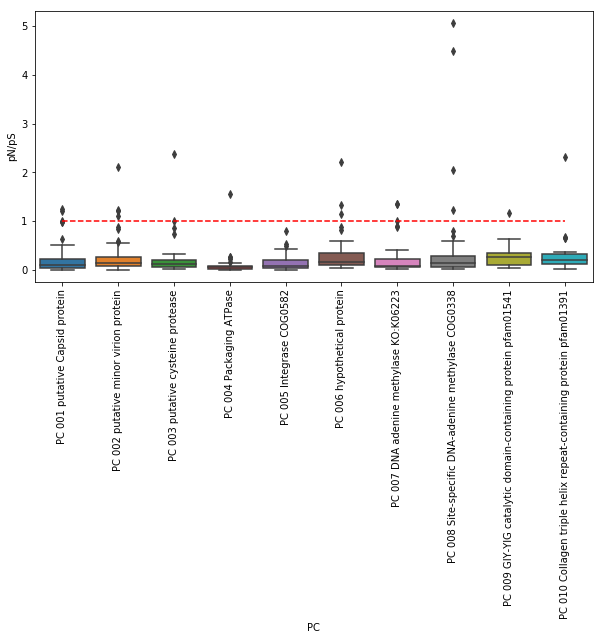

In [258]:
#df3["pN/pS"] = df3["pN/pS"].astype(float)
dftt = df3.sort_values("PC")
id = dftt["PC"].unique()
dftt2 = dftt[dftt["PC"].isin(id[:10])]

plt.figure(figsize=(10,5))
sns.boxplot(data=dftt2,x="PC",y="pN/pS")
plt.xticks(rotation=90)
plt.plot([1]*len(id[:10]),"--",c="red")
#plt.plot([0.5]*len(id[:10]),"--",c="blue",alpha=0.5)

No handles with labels found to put in legend.


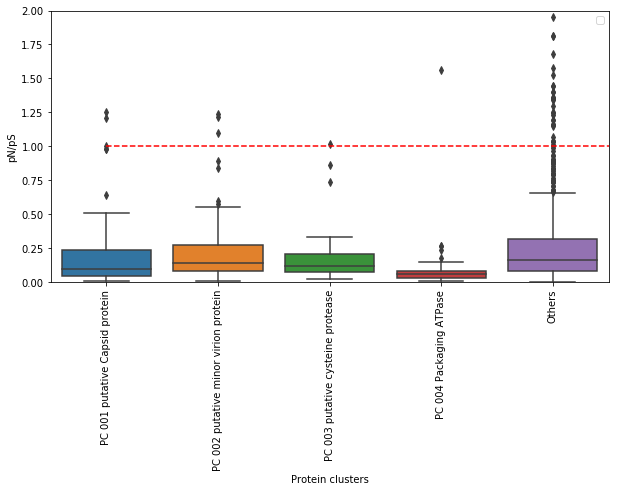

In [279]:
dftt["Protein clusters"] = ""
dftt.loc[dftt["PC"].isin(id[:4]),"Protein clusters"] = dftt.loc[dftt["PC"].isin(id[:4]),"PC"]
dftt.loc[~dftt["PC"].isin(id[:4]),"Protein clusters"] = "Others"

plt.figure(figsize=(10,5))
sns.boxplot(data=dftt,x="Protein clusters",y="pN/pS")
plt.xticks(rotation=90)
plt.plot([1]*len(id[:10]),"--",c="red")
plt.ylim([0,2])
plt.legend()